In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import warnings

In [ ]:
data= pd.read_csv("/content/drive/My Drive/electric/train_1.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data2=pd.read_csv("/content/drive/My Drive/electric/test_1.csv",parse_dates=['DateTime'])
df_2=pd.read_csv("/content/drive/My Drive/electric/test_1.csv",parse_dates=['DateTime'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_2

,DateTime,KWH/hh (per half hour),gen [kW],AC [kW],Furnace [kW],Cellar Lights [kW],Washer [kW],First Floor lights [kW],Utility Rm + Basement Bath [kW],Garage outlets [kW],MBed + KBed outlets [kW],Dryer + egauge [kW],Panel GFI (central vac) [kW],Home Office (R) [kW],Dining room (R) [kW],Microwave (R) [kW],Fridge (R) [kW],Dining room [kW],Microwave [kW],First floor [kW],Tub Whirpool [kW],Kitchen counter [kW],Dishwasher [kW],Fridge [kW],MBed KBed Lights &amp; MasterBath [kW],Living room &amp; Kitchen Lights [kW],Bath GFI (1st &amp; 2nd floor bath) [kW],Total
0,00:00.0,0.107,0.0535,0.000382,0.009187,0.006476,0.000217,0.030033,0.290756,0.004793,0.055181,0.000034,0.000203,0.003258,0.001001,0.004998,0.065379,0.000084,0.004029,0.002208,0.000333,0.005518,0.001448,0.084877,0.003571,0.033180,0.003728,0.611
1,30:00.0,0.073,0.0365,2.142365,0.383307,0.006431,0.000191,0.029504,0.316461,0.004763,0.086386,0.000011,0.000264,0.003641,0.000853,0.004404,0.087758,0.000521,0.003681,0.002276,0.000374,0.005405,0.001393,0.054852,0.007287,0.033118,0.003697,3.180
2,00:00.0,0.032,0.016,0.127562,0.070223,0.006357,0.000276,0.029652,0.277085,0.004712,0.091037,0.000059,0.000244,0.003352,0.000970,0.004861,0.081524,0.000119,0.003998,0.002180,0.000333,0.005470,0.001468,0.099354,0.003386,0.033107,0.003641,0.851
3,30:00.0,0.056,0.028,0.000240,0.008934,0.006367,0.000301,0.029627,0.258774,0.004709,0.090275,0.000076,0.000232,0.003246,0.001002,0.004942,0.069097,0.000044,0.003964,0.002131,0.000419,0.005291,0.001318,0.037871,0.003399,0.038601,0.003724,0.575
4,00:00.0,0.027,0.0135,0.067428,0.020437,0.006326,0.000306,0.029389,0.261327,0.004698,0.090236,0.000039,0.000202,0.002993,0.000985,0.004875,0.004022,0.000119,0.003876,0.002126,0.000450,0.005277,0.001250,0.011896,0.003407,0.033158,0.003739,0.559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,00:00.0,0.059,0.0295,1.013094,0.229629,0.021428,0.000559,0.028434,0.003855,0.004916,0.160122,0.000043,0.006719,0.076389,0.003160,0.004566,0.042429,0.002194,0.003587,0.016936,0.000439,0.000080,0.001486,0.042429,0.015832,0.000203,0.007392,1.690
49995,30:00.0,0.048,0.024,0.980779,0.253768,0.005163,0.000528,0.019276,0.003787,0.004926,0.161734,0.000078,0.006755,0.073754,0.003217,0.004628,0.144274,0.002224,0.003641,0.017159,0.000289,0.000084,0.001729,0.144275,0.015863,0.000055,0.007280,1.860
49996,00:00.0,0.05,0.025,1.200934,0.263613,0.005188,0.000507,0.003753,0.003817,0.004993,0.162053,0.000054,0.006739,0.075859,0.003169,0.004598,0.114974,0.002178,0.003627,0.017301,0.000317,0.000037,0.001665,0.114974,0.015760,0.000082,0.007348,2.010
49997,30:00.0,0.074,0.037,0.000043,0.009700,0.005115,0.000579,0.003884,0.004039,0.005013,0.163918,0.000076,0.006699,0.073827,0.003457,0.004822,0.065956,0.002464,0.003823,0.017304,0.000393,0.000035,0.001531,0.065956,0.015947,0.000171,0.007481,0.462


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model_arima = ARIMA(data["Total"],order=(4,1,1)) 
model_arima_fit = model_arima.fit()

In [ ]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Total   No. Observations:                99999
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -90905.072
Method:                       css-mle   S.D. of innovations              0.601
Date:                Sat, 24 Apr 2021   AIC                         181824.144
Time:                        13:20:52   BIC                         181890.735
Sample:                             1   HQIC                        181844.353
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.156e-06   2.47e-05      0.168      0.866   -4.43e-05    5.26e-05
ar.L1.D.Total     0.5948      0.003    187.210      0.000       0.589       0.601
ar.L2.D.Total    -0.0645      0.004    -17.711      0.000      -0.072      -0.057
ar.L3.D.Total     0.1712      0.004     46.981      0.000       0.164       0.178
ar.L4.D.Total     0.0227      0.003      7.139      0.000       0.016       0.029
ma.L1.D.Total    -0.9964      0.000  -3229.388      0.000      -0.997      -0.996
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2268           -0.0000j            1.2268           -0.0000
AR.2           -0.2164           -2.0645j            2.0758           -0.2666
AR.3           -0.2164           +2.0645j            2.0758            0.2666
AR.4           -8.3433           -0.0000j            8.3433           -0.5000
MA.1            1.0036           +0.0000j            1.0036            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
start=1
end=len(df_2['Total'])
pred=model_arima_fit.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

In [ ]:
pred

1        0.310004
2        0.635961
3        0.529334
4        0.721181
5        0.314556
           ...   
49995    0.259006
49996    0.248271
49997    0.332627
49998    0.390817
49999    0.287506
Name: ARIMA Predictions, Length: 49999, dtype: float64

In [ ]:
pred=pd.DataFrame(pred)

In [ ]:
pred

,ARIMA Predictions
1,0.310004
2,0.635961
3,0.529334
4,0.721181
5,0.314556
...,...
49995,0.259006
49996,0.248271
49997,0.332627
49998,0.390817


In [ ]:
result = pd.concat([pred, df_2['Total']],axis=1)

In [ ]:
result.to_csv('/content/drive/My Drive/electric/file1.csv')

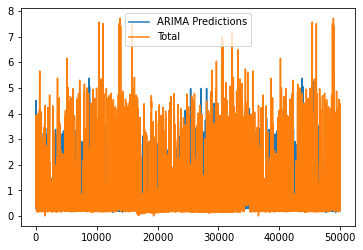

In [ ]:
pred.plot(legend=True)
df_2['Total'].plot(legend=True)


In [ ]:
df_2['Total'].values

array([0.611, 3.18 , 0.851, ..., 2.01 , 0.462, 1.16 ])

In [ ]:
import numpy as np

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)*2)*.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    
                      
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(pred, df_2['Total'].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.


{'corr': -0.08365011101445,
 'mae': 0.626014360754586,
 'mape': 1.204429918760676,
 'me': 0.0053991650971653244,
 'minmax': 0.45919458898554644,
 'mpe': 0.8258027272297502,
 'rmse': 0.0053991650971653244}

In [ ]:
import numpy as np

EPSILON = 1e-10


def _error(actual: np.ndarray, predicted: np.ndarray):
    """ Simple error """
    return actual - predicted


def _percentage_error(actual: np.ndarray, predicted: np.ndarray):
    """
    Percentage error
    Note: result is NOT multiplied by 100
    """
    return _error(actual, predicted) / (actual + EPSILON)


def _naive_forecasting(actual: np.ndarray, seasonality: int = 1):
    """ Naive forecasting method which just repeats previous samples """
    return actual[:-seasonality]


def _relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark
        return _error(actual[seasonality:], predicted[seasonality:]) /\
               (_error(actual[seasonality:], _naive_forecasting(actual, seasonality)) + EPSILON)

    return _error(actual, predicted) / (_error(actual, benchmark) + EPSILON)


def _bounded_relative_error(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Bounded Relative Error """
    if benchmark is None or isinstance(benchmark, int):
        # If no benchmark prediction provided - use naive forecasting
        if not isinstance(benchmark, int):
            seasonality = 1
        else:
            seasonality = benchmark

        abs_err = np.abs(_error(actual[seasonality:], predicted[seasonality:]))
        abs_err_bench = np.abs(_error(actual[seasonality:], _naive_forecasting(actual, seasonality)))
    else:
        abs_err = np.abs(_error(actual, predicted))
        abs_err_bench = np.abs(_error(actual, benchmark))

    return abs_err / (abs_err + abs_err_bench + EPSILON)


def _geometric_mean(a, axis=0, dtype=None):
    """ Geometric mean """
    if not isinstance(a, np.ndarray):  # if not an ndarray object attempt to convert it
        log_a = np.log(np.array(a, dtype=dtype))
    elif dtype:  # Must change the default dtype allowing array type
        if isinstance(a, np.ma.MaskedArray):
            log_a = np.log(np.ma.asarray(a, dtype=dtype))
        else:
            log_a = np.log(np.asarray(a, dtype=dtype))
    else:
        log_a = np.log(a)
    return np.exp(log_a.mean(axis=axis))


def mse(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Squared Error """
    return np.mean(np.square(_error(actual, predicted)))


def rmse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Mean Squared Error """
    return np.sqrt(mse(actual, predicted))


def nrmse(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Root Mean Squared Error """
    return rmse(actual, predicted) / (actual.max() - actual.min())


def me(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Error """
    return np.mean(_error(actual, predicted))


def mae(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Absolute Error """
    return np.mean(np.abs(_error(actual, predicted)))


mad = mae  # Mean Absolute Deviation (it is the same as MAE)


def gmae(actual: np.ndarray, predicted: np.ndarray):
    """ Geometric Mean Absolute Error """
    return _geometric_mean(np.abs(_error(actual, predicted)))


def mdae(actual: np.ndarray, predicted: np.ndarray):
    """ Median Absolute Error """
    return np.median(np.abs(_error(actual, predicted)))


def mpe(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Percentage Error """
    return np.mean(_percentage_error(actual, predicted))


def mape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Absolute Percentage Error
    Properties:
        + Easy to interpret
        + Scale independent
        - Biased, not symmetric
        - Undefined when actual[t] == 0
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.abs(_percentage_error(actual, predicted)))


def mdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(np.abs(_percentage_error(actual, predicted)))


def smape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Mean Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def smdape(actual: np.ndarray, predicted: np.ndarray):
    """
    Symmetric Median Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.median(2.0 * np.abs(actual - predicted) / ((np.abs(actual) + np.abs(predicted)) + EPSILON))


def maape(actual: np.ndarray, predicted: np.ndarray):
    """
    Mean Arctangent Absolute Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.mean(np.arctan(np.abs((actual - predicted) / (actual + EPSILON))))


def mase(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """
    Mean Absolute Scaled Error
    Baseline (benchmark) is computed with naive forecasting (shifted by @seasonality)
    """
    return mae(actual, predicted) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))


def std_ae(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Error """
    __mae = mae(actual, predicted)
    return np.sqrt(np.sum(np.square(_error(actual, predicted) - __mae))/(len(actual) - 1))


def std_ape(actual: np.ndarray, predicted: np.ndarray):
    """ Normalized Absolute Percentage Error """
    __mape = mape(actual, predicted)
    return np.sqrt(np.sum(np.square(_percentage_error(actual, predicted) - __mape))/(len(actual) - 1))


def rmspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Mean Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.mean(np.square(_percentage_error(actual, predicted))))


def rmdspe(actual: np.ndarray, predicted: np.ndarray):
    """
    Root Median Squared Percentage Error
    Note: result is NOT multiplied by 100
    """
    return np.sqrt(np.median(np.square(_percentage_error(actual, predicted))))


def rmsse(actual: np.ndarray, predicted: np.ndarray, seasonality: int = 1):
    """ Root Mean Squared Scaled Error """
    q = np.abs(_error(actual, predicted)) / mae(actual[seasonality:], _naive_forecasting(actual, seasonality))
    return np.sqrt(np.mean(np.square(q)))


def inrse(actual: np.ndarray, predicted: np.ndarray):
    """ Integral Normalized Root Squared Error """
    return np.sqrt(np.sum(np.square(_error(actual, predicted))) / np.sum(np.square(actual - np.mean(actual))))


def rrse(actual: np.ndarray, predicted: np.ndarray):
    """ Root Relative Squared Error """
    return np.sqrt(np.sum(np.square(actual - predicted)) / np.sum(np.square(actual - np.mean(actual))))


def mre(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Error """
    return np.mean(_relative_error(actual, predicted, benchmark))


def rae(actual: np.ndarray, predicted: np.ndarray):
    """ Relative Absolute Error (aka Approximation Error) """
    return np.sum(np.abs(actual - predicted)) / (np.sum(np.abs(actual - np.mean(actual))) + EPSILON)


def mrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Relative Absolute Error """
    return np.mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mdrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Median Relative Absolute Error """
    return np.median(np.abs(_relative_error(actual, predicted, benchmark)))


def gmrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Geometric Mean Relative Absolute Error """
    return _geometric_mean(np.abs(_relative_error(actual, predicted, benchmark)))


def mbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Mean Bounded Relative Absolute Error """
    return np.mean(_bounded_relative_error(actual, predicted, benchmark))


def umbrae(actual: np.ndarray, predicted: np.ndarray, benchmark: np.ndarray = None):
    """ Unscaled Mean Bounded Relative Absolute Error """
    __mbrae = mbrae(actual, predicted, benchmark)
    return __mbrae / (1 - __mbrae)


def mda(actual: np.ndarray, predicted: np.ndarray):
    """ Mean Directional Accuracy """
    return np.mean((np.sign(actual[1:] - actual[:-1]) == np.sign(predicted[1:] - predicted[:-1])).astype(int))


METRICS = {
    'mse': mse,
    'rmse': rmse,
    'nrmse': nrmse,
    'me': me,
    'mae': mae,
    'mad': mad,
    'gmae': gmae,
    'mdae': mdae,
    'mpe': mpe,
    'mape': mape,
    'mdape': mdape,
    'smape': smape,
    'smdape': smdape,
    'maape': maape,
    'mase': mase,
    'std_ae': std_ae,
    'std_ape': std_ape,
    'rmspe': rmspe,
    'rmdspe': rmdspe,
    'rmsse': rmsse,
    'inrse': inrse,
    'rrse': rrse,
    'mre': mre,
    'rae': rae,
    'mrae': mrae,
    'mdrae': mdrae,
    'gmrae': gmrae,
    'mbrae': mbrae,
    'umbrae': umbrae,
    'mda': mda,
}


def evaluate(actual: np.ndarray, predicted: np.ndarray, metrics=('mae', 'mse', 'smape', 'umbrae')):
    results = {}
    for name in metrics:
        try:
            results[name] = METRICS[name](actual, predicted)
        except Exception as err:
            results[name] = np.nan
            print('Unable to compute metric {0}: {1}'.format(name, err))
    return results


def evaluate_all(actual: np.ndarray, predicted: np.ndarray):
    return evaluate(actual, predicted, metrics=set(METRICS.keys()))

In [ ]:
evaluate_all(df_2['Total'],pred)

Unable to compute metric mda: Can only compare identically-labeled Series objects
Unable to compute metric mase: float division by zero


{'gmae': nan,
 'gmrae': nan,
 'inrse': 1.2895012750599208,
 'maape': 0.5927474599371347,
 'mad': 0.6239942661672282,
 'mae': 0.6239942661672282,
 'mape': 1.1931732447135757,
 'mase': nan,
 'mbrae': 0.9999999978806887,
 'mda': nan,
 'mdae': nan,
 'mdape': nan,
 'mdrae': nan,
 'me': -0.005405743224597548,
 'mpe': -0.8163083790198956,
 'mrae': 6239464385.324642,
 'mre': -54787488.73977226,
 'mse': 1.0687760233736352,
 'nrmse': 0.13396260853113792,
 'rae': 1.3041710173283694,
 'rmdspe': nan,
 'rmse': 1.0338162425564976,
 'rmspe': 2.8647014078891506,
 'rmsse': inf,
 'rrse': 1.2895012750599208,
 'smape': 0.6702118084583621,
 'smdape': nan,
 'std_ae': 1.2103268868930641,
 'std_ape': 3.402671183471373,
 'umbrae': 471851401.1430282}